# Homework 2
### Sourita Nag and Sarah Ruckman
### Reading and Creating the test/train datasets 

In [1]:
import pandas as pd
import numpy as np
import statistics as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Calling the data
abalone_data = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Abalone/Abalone.csv')
abalone_data = np.array(abalone_data)
abalone_data
X = abalone_data[:,0:7]
X
Y = abalone_data[:,-1]
Y = Y
Y
#splitting it into test and train with 90% train and 10% test
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)  
X_train,X_test,Y_train,Y_test

(array([[0.48  , 0.37  , 0.1   , ..., 0.243 , 0.1015, 0.135 ],
        [0.615 , 0.46  , 0.15  , ..., 0.4935, 0.201 , 0.2745],
        [0.605 , 0.47  , 0.165 , ..., 0.611 , 0.2275, 0.292 ],
        ...,
        [0.565 , 0.435 , 0.185 , ..., 0.354 , 0.2045, 0.31  ],
        [0.61  , 0.47  , 0.16  , ..., 0.449 , 0.2345, 0.2945],
        [0.515 , 0.375 , 0.11  , ..., 0.3005, 0.131 , 0.15  ]]),
 array([[0.45  , 0.335 , 0.105 , ..., 0.1575, 0.0795, 0.1095],
        [0.7   , 0.54  , 0.215 , ..., 0.6675, 0.3125, 0.71  ],
        [0.665 , 0.51  , 0.175 , ..., 0.675 , 0.2985, 0.325 ],
        ...,
        [0.61  , 0.48  , 0.165 , ..., 0.4215, 0.264 , 0.335 ],
        [0.55  , 0.41  , 0.125 , ..., 0.2505, 0.1635, 0.195 ],
        [0.62  , 0.47  , 0.155 , ..., 0.447 , 0.171 , 0.284 ]]),
 array([ 8., 10.,  9., ..., 20.,  9.,  6.]),
 array([ 7., 24., 10.,  4.,  9.,  8., 14.,  9.,  8., 12., 10., 13., 10.,
        11., 14.,  8.,  6.,  9., 10., 10., 16., 12.,  9.,  8., 10.,  9.,
         8., 14.,  9., 

### Part a

In [3]:
Train_MSE = []
Test_MSE = []
for i in range(20):
    X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)  
    Y_hat = np.mean(Y_train) #Model fitted
    Y_pred_train = Y_hat
    Y_pred_test = Y_hat
    Training_MSE = np.mean((Y_train - Y_pred_train)**2)
    Train_MSE.append(Training_MSE)
    Testing_MSE = np.mean((Y_test - Y_pred_test)**2)
    Test_MSE.append(Testing_MSE)
Train_MSE
Test_MSE
Final_Train_MSE = sm.mean(Train_MSE)
print(f'The Average Train MSE is {Final_Train_MSE}')
Final_Test_MSE = sm.mean(Test_MSE)
print(f'The Average Test MSE is {Final_Test_MSE}')

The Average Train MSE is 10.395210926250176
The Average Test MSE is 10.37341998953599


### Part b

In [4]:
#recreating the data 
#function for calculating the R2
def R2(y_true,y_pred):
    y_true_mean = np.mean(y_true)
    Regn_SS = np.sum((y_true - y_pred)**2)
    TSS = np.sum((y_true - y_true_mean)**2)
    R2 = 1 - (Regn_SS/TSS)
    return R2
    

In [5]:
Train_MSE = []
Test_MSE = []
Train_R2 = []
Test_R2 = []
logs = []

for i in range(20):
    
    X1 = np.column_stack((np.ones((X.shape[0])).reshape(X.shape[0],1),X))
    X1.shape
    Y.shape
    X_train, X_test,Y_train, Y_test = train_test_split(X1,Y,test_size=0.1,shuffle=True) 
    X_train.shape
    X_train

    lam = 0.001
    beta_hat = (np.linalg.inv(X_train.T@X_train + lam*np.identity(X_train.shape[1])))@X_train.T@Y_train
    Y_pred_train = X_train@beta_hat
    Y_pred_test = X_test@beta_hat
    Training_MSE = np.mean((Y_train - Y_pred_train)**2)
    Train_MSE.append(Training_MSE)
    Testing_MSE = np.mean((Y_test - Y_pred_test)**2)
    Test_MSE.append(Testing_MSE)
    #Training_R2 = R2(Y_train,Y_pred_train)
    Training_R2 = r2_score(Y_train,Y_pred_train)
    Train_R2.append(Training_R2)
    #Testing_R2 = R2(Y_test,Y_pred_test)
    Testing_R2 = r2_score(Y_test,Y_pred_test)
    Test_R2.append(Testing_R2)
    log_val = np.log(np.linalg.det(X_train.T@X_train + lam*np.identity(X_train.shape[1])))
    logs.append(log_val)

avg_Train_MSE = sm.mean(Train_MSE)
print(f'The Average Train MSE is {avg_Train_MSE}')
avg_Test_MSE = sm.mean(Test_MSE)
print(f'The Average Test MSE is {avg_Test_MSE}')
avg_train_R2 = sm.mean(Train_R2)
print(f'The Average Train R2 is {avg_train_R2}')
avg_Test_R2 = sm.mean(Test_R2)
print(f'The Average Test R2 is {avg_Test_R2}')
std_dev_Train_MSE = sm.stdev(Train_MSE)
print(f'The Standard deviation of Train MSE is {std_dev_Train_MSE}')
std_dev_Test_MSE = sm.stdev(Test_MSE)
print(f'The Standard deviation of Test MSE is {std_dev_Test_MSE}')
std_dev_train_R2 = sm.stdev(Train_R2)
print(f'The Standard deviation of Train R2 is {std_dev_train_R2}')
std_dev_Test_R2 = sm.stdev(Test_R2)
print(f'The Standard deviation of Test R2 is {std_dev_Test_R2}')

avg_log_val = sm.mean(logs)
print(f'The average of log determinant is {avg_log_val}')
std_dev_log_val = sm.stdev(logs)
print(f'The standard deviation of log determinant is {std_dev_log_val}')

The Average Train MSE is 4.88847360249103
The Average Test MSE is 5.227966014220465
The Average Train R2 is 0.5307475660340135
The Average Test R2 is 0.48292377006387915
The Standard deviation of Train MSE is 0.04839800460711591
The Standard deviation of Test MSE is 0.562203619014987
The Standard deviation of Train R2 is 0.004583285229299369
The Standard deviation of Test R2 is 0.06124164453419147
The average of log determinant is 22.255834980700158
The standard deviation of log determinant is 0.2967619587344039


### Part c

In [6]:
avg_alldepth_Train_MSE = []
avg_alldepth_Test_MSE = []
avg_alldepth_Train_R2 = []
avg_alldepth_Test_R2 = []
null_model = []

for d in range(1,8):
    train_MSE = []
    test_MSE = []
    train_R2 = []
    test_R2 = []
    for i in range(20):
        X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True) 
        model = DecisionTreeRegressor(random_state=44,max_depth= d)
        model.fit(X_train,Y_train)
        Y_preds_train = model.predict(X_train)
        Y_preds_test = model.predict(X_test)
        training_MSE = np.mean((Y_train - Y_preds_train)**2)
        train_MSE.append(training_MSE)
        testing_MSE = np.mean((Y_test - Y_preds_test)**2)
        test_MSE.append(testing_MSE)
        training_R2 = r2_score(Y_train,Y_preds_train)
        train_R2.append(training_R2)
        testing_R2 = r2_score(Y_test,Y_preds_test)
        test_R2.append(testing_R2)
        null_model_MSE = np.mean(Y_train - np.mean(Y_train))
        null_model.append(null_model_MSE)
    avg_train_MSE = sm.mean(train_MSE)
    avg_alldepth_Train_MSE.append(avg_train_MSE)
    avg_test_MSE = sm.mean(test_MSE)
    avg_alldepth_Test_MSE.append(avg_test_MSE)
    avg_train_R2 = sm.mean(train_R2)
    avg_alldepth_Train_R2.append(avg_train_R2)
    avg_test_R2 = sm.mean(test_R2)
    avg_alldepth_Test_R2.append(avg_test_R2)
#null_model_mse = np.mean(null_model)

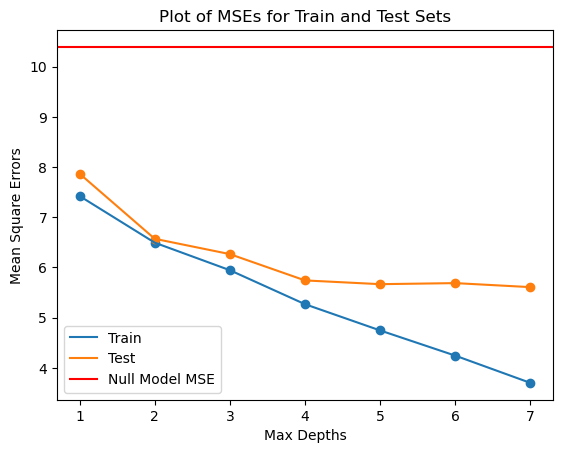

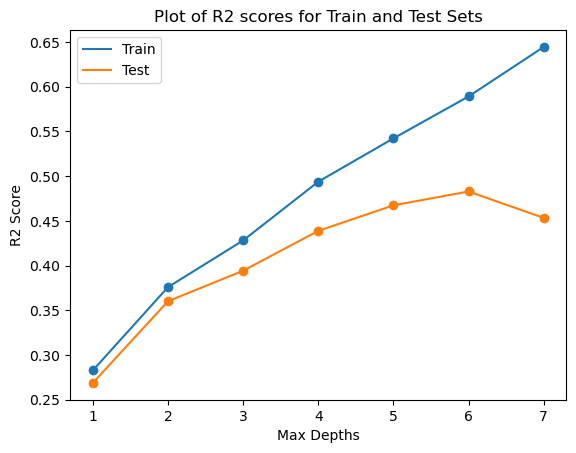

In [7]:
#Plotting the results
plt.scatter(np.arange(1,8,1),avg_alldepth_Train_MSE)
plt.plot(np.arange(1,8,1),avg_alldepth_Train_MSE,label = 'Train')
plt.scatter(np.arange(1,8,1),avg_alldepth_Test_MSE)
plt.plot(np.arange(1,8,1),avg_alldepth_Test_MSE, label = 'Test')
plt.xlabel('Max Depths')
plt.ylabel('Mean Square Errors')
plt.axhline(Final_Train_MSE,color = 'red',label = 'Null Model MSE')
plt.title('Plot of MSEs for Train and Test Sets')
plt.legend()
plt.show()

plt.scatter(np.arange(1,8,1),avg_alldepth_Train_R2)
plt.plot(np.arange(1,8,1),avg_alldepth_Train_R2,label = 'Train')
plt.scatter(np.arange(1,8,1),avg_alldepth_Test_R2)
plt.plot(np.arange(1,8,1),avg_alldepth_Test_R2, label = 'Test')
plt.xlabel('Max Depths')
plt.ylabel('R2 Score')
plt.title('Plot of R2 scores for Train and Test Sets')
plt.legend()
plt.show()

### Part d

In [8]:
N_trees = [10,30,100,300]
avg_alltrees_train_MSE = []
avg_alltrees_test_MSE = []
avg_alltrees_train_R2 = []
avg_alltrees_test_R2 = []
std_devs_train_MSE = []
std_devs_test_MSE = []
std_devs_train_R2 = []
std_devs_test_R2 = []

for k in N_trees:
    train_MSE = []
    test_MSE = []
    train_R2 = []
    test_R2 = []
    for i in range(20):
        X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True) 
        model = RandomForestRegressor(n_estimators = k,random_state = 0)
        model.fit(X_train,Y_train)
        Y_preds_train = model.predict(X_train)
        Y_preds_test = model.predict(X_test)
        training_MSE = np.mean((Y_train - Y_preds_train)**2)
        train_MSE.append(training_MSE)
        testing_MSE = np.mean((Y_test - Y_preds_test)**2)
        test_MSE.append(testing_MSE)
        Training_R2 = r2_score(Y_train,Y_preds_train)
        train_R2.append(Training_R2)
        Testing_R2 = r2_score(Y_test,Y_preds_test)
        test_R2.append(Testing_R2)
    
    std_train_MSE = np.std(train_MSE) 
    std_devs_train_MSE.append(std_train_MSE)
    std_test_MSE = np.std(test_MSE)
    std_devs_test_MSE.append(std_test_MSE)
    std_train_R2 = np.std(train_R2)
    std_devs_train_R2.append(std_train_R2)
    std_test_r2 = np.std(test_R2)
    std_devs_test_R2.append(std_test_r2)
    
    avg_train_MSE = np.mean(train_MSE)
    avg_alltrees_train_MSE.append(avg_train_MSE)
    avg_test_MSE = np.mean(test_MSE)
    avg_alltrees_test_MSE.append(avg_test_MSE)
    avg_train_R2 = np.mean(train_R2)
    avg_alltrees_train_R2.append(avg_train_R2)
    avg_test_R2 = np.mean(test_R2)
    avg_alltrees_test_R2.append(avg_test_R2)        

In [9]:
all_data = pd.DataFrame({'N_trees':N_trees,'Average_train_MSE':avg_alltrees_train_MSE,'Average_test_MSE':avg_alltrees_test_MSE,
                        'Average_train_R2':avg_alltrees_train_R2,'Average_test_R2':avg_alltrees_test_R2,
                         'Std Deviation MSE Train':std_devs_train_MSE,'Std Deviation MSE Test':std_devs_test_MSE,
                         'Std Deviation R2 Train':std_devs_train_R2,'Std Deviation R2 Test':std_devs_test_R2})
all_data.set_index('N_trees')

,Average_train_MSE,Average_test_MSE,Average_train_R2,Average_test_R2,Std Deviation MSE Train,Std Deviation MSE Test,Std Deviation R2 Train,Std Deviation R2 Test
N_trees,,,,,,,,
10,0.918809,5.234672,0.911446,0.501034,0.035345,0.538998,0.003393,0.040796
30,0.728203,5.190744,0.929625,0.517131,0.019021,0.627910,0.001701,0.048609
100,0.668598,5.107576,0.935433,0.522979,0.010056,0.425009,0.000950,0.027904
300,0.653470,4.757320,0.937037,0.546697,0.011223,0.557321,0.000815,0.037770
